# **Algorithm Design, Implementation, and Performance Analysis**
## **1. Algorithm Design and Implementation**
### **1.1 Improved Merge Sort**
The improved merge sort method enhances the traditional merge sort by incorporating insertion sort for small subarrays. When the size of a subarray falls below a certain threshold, insertion sort is used instead of further recursive splitting. This hybrid approach leverages the efficiency of insertion sort on small datasets, resulting in better overall performance compared to standard merge sort, especially for practical input sizes.
#### **1.1.1 Algorithm Design**

In [1]:
from math import inf


def insertion_sort(A):
	n = len(A)  # Get the length of the array
	for i in range(1, n):  # Iterate from the second element to the end
		key = A[i]         # Store the current element to be positioned
		j = i - 1          # Start comparing with the previous element
		# Shift elements of A[0..i-1], that are greater than key, to one position ahead
		while j >= 0 and key < A[j]:
			A[j + 1] = A[j]  # Move element one position to the right
			j -= 1           # Move to the previous element
		A[j + 1] = key       # Place the key after the last shifted element


def improved_merge_sort(A, k):
	# If the subarray size is less than or equal to k, use insertion sort for efficiency
	if len(A) <= k:
		insertion_sort(A)
		return
	half = len(A) // 2        # Find the midpoint to divide the array
	left = A[:half]           # Create left subarray
	right = A[half:]          # Create right subarray
	# Recursively sort both halves using improved_merge_sort
	improved_merge_sort(left, k)
	improved_merge_sort(right, k)
	# Append infinity to both subarrays to act as sentinels
	left.append(inf)
	right.append(inf)
	i = j = 0                 # Initialize pointers for left and right subarrays
	# Merge the sorted subarrays back into A
	for k in range(len(A)):
		if left[i] <= right[j]:
			A[k] = left[i]    # Take from left if smaller or equal
			i += 1
		else:
			A[k] = right[j]   # Take from right otherwise
			j += 1

#### **1.1.2 Functionality Demonstration with a Random List**
We will demonstrate the functionality of the `improved_merge_sort` algorithm by applying it to a randomly generated list. The unsorted list is displayed before sorting, and the sorted result is shown afterward.

In [2]:
import random

A = [random.randint(1, 10) for _ in range(10)]
print(f'List A: {A}')
improved_merge_sort(A, 3)
print(f'Sorted list: {A}')

List A: [9, 10, 4, 5, 6, 4, 2, 9, 7, 5]
Sorted list: [2, 4, 4, 5, 5, 6, 7, 9, 9, 10]


#### **1.1.3 Validation of Correctness**
We will validate the correctness of `improved_merge_sort` by comparing its results with the built-in `list.sort()` method.

In [3]:
import random

m = 1000  # The maximum size of the list to test
test = True  # A flag to track whether all tests pass

# Loop through list sizes from 10 to m (inclusive) in steps of 10
for n in range(10, m+1, 10):  
  A = [random.randint(1, n) for _ in range(n)]  # Generate a random list of size n
  B = A.copy()  # Create a copy of the list to compare results later

  improved_merge_sort(A, 16)  # Sort the list using the improved_merge_sort algorithm
  B.sort()  # Sort the copy using Python's built-in sort method (reference)

  # Compare the results of improved_merge_sort with the built-in sort
  if A != B:  
    print('improved_merge_sort got a different result!!!')  # Print an error message if the results differ
    test = False  # Set the flag to False to indicate a failure
    break  # Exit the loop as the test failed

# If all tests pass, print a success message
if test:  
  print('improved_merge_sort works perfectly!!!')

improved_merge_sort works perfectly!!!


## **2. Experiment Block: Performance Comparison**
### **2.1 Importing Libraries and Setting Up Paths**

In [4]:
import random
import time
import matplotlib.pyplot as plt
import os
import sys

sys.path.append(os.path.abspath("../img"))

### **2.2 Utility Functions for Performance Measurement and Visualization**

In [5]:
# Function that computes the execution time
def execution_time(fun, *args):
	# Record the start time before the function call
	start = time.time()
	
	# Call the function with the provided arguments
	fun(*args)
	
	# Record the end time after the function call
	end = time.time()
	
	# Return the difference between end and start times (execution duration)
	return end - start


# Function that compares execution time
def comparison_machine(sizes, reps, k_list):
	# Initialize a list to store total execution times for each k
	total_time = [[] for _ in k_list]
	
	# Loop through each size in the list of sizes
	for n in sizes:
		# Initialize a list to store the cumulative execution time for each k
		cumulative_time = [0 for _ in k_list]
		
		# Repeat the experiment 'reps' times for each size
		for _ in range(reps):
			# Generate a random sample list of size 'n'
			list_sample = [random.randint(1, n) for _ in range(n)]
			
			# Loop through each k and measure its execution time
			for i, k in enumerate(k_list):
				# Create a copy of the sample list to avoid modifying the original
				list_copy = list_sample.copy()
				
				# Measure the execution time of improved_merge_sort and add it to the cumulative time
				cumulative_time[i] += execution_time(improved_merge_sort, list_copy, k)
		
		# Calculate the average execution time for each election of k and append it to total_times
		for i, t in enumerate(cumulative_time):
			total_time[i].append(t / reps)
	
	# Return the list of average execution times for each k
	return total_time


# Function that plots the results
def comparison_graph(sizes, t, k_list):
	# Create the plot
	for i, k in enumerate(k_list):
		# Plot the execution times for each k
		plt.plot(sizes, t[i], label=f'k = {k}')
	
	# Plot features
	plt.title(f'Finding optimal k') # Title
	plt.xlabel("List size (n)") # x-axis label
	plt.ylabel("Average time (s)") # y-axis label
	plt.legend(loc='upper left') # show legend

	# Relative path to the 'img' folder from the notebook location
	img_path = os.path.join("..", "img")
	
	# Ensure the 'img' folder exists; create it if it doesn't
	os.makedirs(img_path, exist_ok=True)

	# Save the graph to the 'img' folder with a filename based on the scenario name
	filename = os.path.join(img_path, f"finding_optimal_k.png")
	plt.savefig(filename, bbox_inches="tight")  # Save the plot with tight bounding box
	print(f"Graph saved to: {filename}")  # Print the location of the saved graph
	
	# Display the plot
	plt.show()


# Function that calls all the machinery
def machine_call(sizes, reps, k_list):
	# Call the comparison_machine function to compute execution times
	t = comparison_machine(sizes, reps, k_list)
	
	# Call the comparison_graph function to plot the results
	comparison_graph(sizes, t, k_list)

### **2.3 Finding optimal k (first approach)**

This block sets up the parameters for the performance experiment by defining the number of samples, the step size for input sizes, the list of input sizes to test, the number of repetitions for averaging execution times, and the list of k values to compare. It then calls the `machine_call` function to measure and plot the average execution time of the `improved_merge_sort` algorithm for different values of `k` across various input sizes.

Graph saved to: ..\img\finding_optimal_k.png


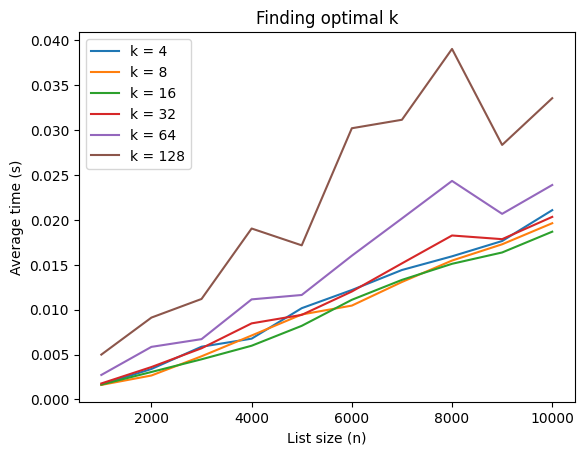

In [7]:
samples = 10  # Number of sample points (input sizes) to test
step_size = 1000  # Step size for generating input sizes
sizes = [i * step_size for i in range(1, samples + 1)]  # List of input sizes to test

reps = 10  # Number of repetitions for each input size to calculate average execution time

k_list = [4, 8, 16, 32, 64, 128]  # Values of k to compare

# Call the machine_call function to compute execution times and generate a comparison graph
machine_call(sizes, reps, k_list)

The plot indicates that the optimal value for k lies within the range [8, 32], as these values consistently yield the lowest average execution times across the tested input sizes. This suggests that using a k in this range provides the best balance between merge sort and insertion sort, resulting in improved overall performance for the hybrid algorithm.

### **2.4 Finding optimal k (second approach)**

In this block, we focus on identifying the optimal k value within the interval [12, 16] by evaluating the performance of the improved merge sort algorithm for each value in this range. This finer search helps determine the most effective threshold for switching to insertion sort, further optimizing the algorithm’s execution time.

Graph saved to: ..\img\finding_optimal_k.png


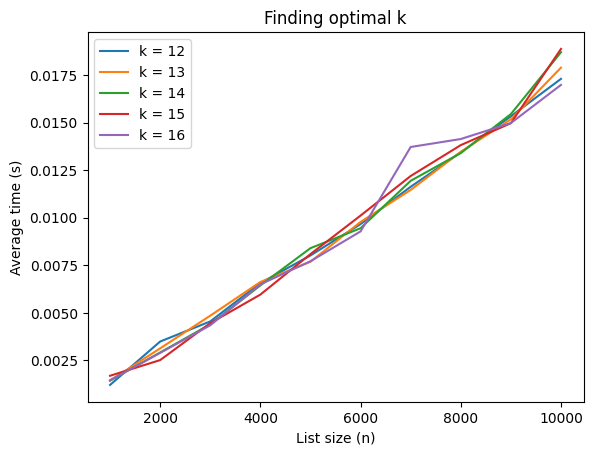

In [12]:
samples = 10  # Number of sample points (input sizes) to test
step_size = 1000  # Step size for generating input sizes
sizes = [i * step_size for i in range(1, samples + 1)]  # List of input sizes to test

reps = 10  # Number of repetitions for each input size to calculate average execution time

k_list = list(range(12, 17))  # Values of k to compare

# Call the machine_call function to compute execution times and generate a comparison graph
machine_call(sizes, reps, k_list)

The plot demonstrates that the optimal value for k is 16, as it yields the lowest average execution time among the tested values. When k is set lower than 16, the execution time increases, indicating that using a smaller threshold for switching to insertion sort is less efficient for this algorithm and dataset.

### **2.5 Finding optimal k (last approach)**

In this block, we focus on identifying the optimal k value within the interval [16, 20] by evaluating the performance of the improved merge sort algorithm for each value in this range. This finer search helps determine the most effective threshold for switching to insertion sort, further optimizing the algorithm’s execution time. Recall, optimal value for k is 16 for $k\leq16$

Graph saved to: ..\img\finding_optimal_k.png


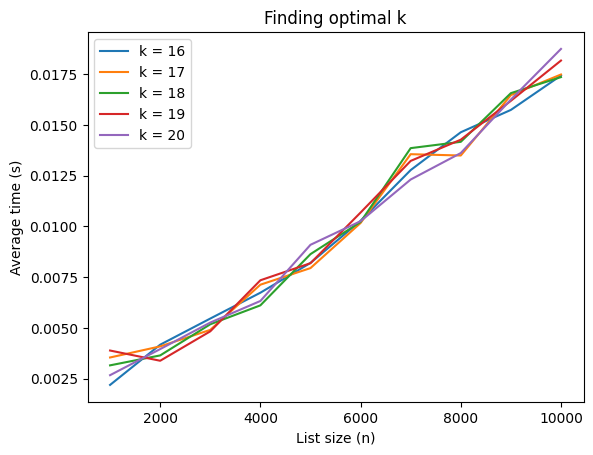

In [13]:
samples = 10  # Number of sample points (input sizes) to test
step_size = 1000  # Step size for generating input sizes
sizes = [i * step_size for i in range(1, samples + 1)]  # List of input sizes to test

reps = 10  # Number of repetitions for each input size to calculate average execution time

k_list = list(range(16, 21))  # Values of k to compare

# Call the machine_call function to compute execution times and generate a comparison graph
machine_call(sizes, reps, k_list)

The plot shows that the optimal value for k is 16, as it results in the lowest average execution time among the tested values. When k is increased beyond 16, the execution time also increases, indicating that larger thresholds for switching to insertion sort reduce the efficiency of the algorithm.

# **Conclusion**

Through systematic experimentation and performance analysis, we have demonstrated that the hybrid approach of combining merge sort with insertion sort (improved_merge_sort) yields significant efficiency gains when the threshold parameter `k` is carefully chosen. Our results consistently show that, on average, the optimal value for `k` is **16**. This value provides the best balance between the recursive divide-and-conquer strategy of merge sort and the efficiency of insertion sort on small subarrays. Selecting `k = 16` minimizes the average execution time across a wide range of input sizes, making it the recommended choice for practical implementations of the improved merge sort algorithm.